# Getting Started

This first workbook will introduce several new concepts:
 * Cloning code from github
 * Jupyter notebooks
 * Working with syzygy
 * Accessing the Canvas API
 

## Getting and running this code
run this command to clone the git repository:

    git clone <repo>

There's a setup notebook you will need to run before this one (it's called setup).

This notebook expects to find a file called `.canvas_api_key` that contains your API key (and nothing else). You will need to create that (in the same directory as this file) from the command line in jupyter.

First, create a Canvas API key through Canvas.

Second, save the API key to a file. from the jupyter hub page choose "New" and then "Terminal" to get an interactive terminal session. Use this command: 

    echo "replace this with your Canvas API key" >> .canvas_api_key
    


## Working with Jupyter notebooks
There's a great tutorial made available along with syzygy: https://intro.syzygy.ca

If you've never used Jupyter notebooks before, that's a great place to get started.

There are many shortcuts to make interacting with a notebook easier, for example you can run just the current cell (rather than re-running the entire notebook) with `shift + enter`

## Working with the Canvas API

This notebook is used to export data from Canvas. The data we export will be saved in `json` format.

It contains examples using the `canvasapi` python package (thanks to UCF!). Most (but not all) API endpoints from Canvas are available in the `canvasapi` package.

Useful links about the Canvas API:
 * https://github.com/ucfopen/canvasapi
 * https://canvas.instructure.com/doc/api/

In [3]:
from canvasapi import Canvas
import json

In [7]:
#setup some global variables for the script

# load API_KEY from a file
# we doing this so that we can share this code without sharing our secret keys

API_KEY=open(".canvas_api_key").readline().rstrip('\n')

API_URL = "https://canvas.ubc.ca"
canvas = Canvas(API_URL, API_KEY)

COURSE_NUM = 30739 # HackUBC course ID 
print(API_KEY)


11224~lo5nQQSHe1Vd5IDyqawUmcJxFfhWaDKz4Hdj5MyCTR4fzjCG523GDSs2dblLeZtC


In [8]:
# Here we create the canvas python object, we use that to interact with the Canvas API
canvas = Canvas(API_URL, API_KEY)

# this should print a json representation of your Canvas user information
print(json.dumps(json.loads(canvas.get_user('self').to_json()),sort_keys=True, indent=4))

{
    "avatar_url": "https://canvas.ubc.ca/images/messages/avatar-50.png",
    "created_at": "2017-10-21T01:00:35-07:00",
    "effective_locale": "en-CA",
    "id": 91745,
    "locale": null,
    "name": "Zi Rui Ding",
    "permissions": {
        "can_update_avatar": true,
        "can_update_name": false
    },
    "short_name": "Zi Rui Ding",
    "sortable_name": "Ding, Zi Rui"
}


## A note about Canvas discussions
the API divides discussion content/posts into three different types:

* `discussion topics`: The individual discussion forums
* `discussion entries`: The top level entries in the discussion. Each is an original response to the discussion topic.
* `discussion replies`: The response to each entry. In Canvas, these are displayed indented and nested under the corresponding discussion entry.

In [9]:
# get all the discussion topics

# many methods of the Canvas API load data lazily (when needed)
# to force retreival of all items, we can wrap the request in a list()
all_topics = list(canvas.get_course(COURSE_NUM).get_discussion_topics())

In [10]:
# print all the discussion topic names and their total number of posts
for t in all_topics:
    print(t.title, t.discussion_subentry_count)
    #note, this is the *full* number of posts in the topic


Test Post 1
Testing topic 2
What is your favourite place on campus? 4
What video games are you playing right now? 2
Who likes potatoes on pizza? 9
Favourite Eating Spots Near Campus? 6
What do you choose?  15
Learning Analytics Conference at UBC 1
Hackathon Feedback 4
What do you mean? 3
What do you hear?  20
What do you see? 23
Let's Get Some Discussion Started 19
Share your Canvas API ideas/discoveries. 0
Hackathon Open Q&A  0
Share things you can't do (based on technical limitations) that you wish you could. 0
Share any difficulties/ask for help from other teams. 0


In [11]:
# print all the posts in the largest discussion

largest = sorted(all_topics, key=lambda x: x.discussion_subentry_count, reverse=True)[0]

print (largest.title, len(list(largest.get_topic_entries())))
#note: this is only the *top-level* entries in the discussion, 
# not all replies to those entries

What do you see? 21


In [12]:
# get all the top-level entries
# notice that this is different from the number of posts above
all_entries = []
for t in all_topics:
    topic_entries = list(t.get_topic_entries())
    all_entries.extend(topic_entries)
print("total number of top-level entries: ", len(all_entries))

total number of top-level entries:  86


In [13]:
# get all the replies
# again, notice that this is different from the number of posts above
all_replies = []
for e in all_entries:
    entry_replies = list(e.get_replies())
    all_replies.extend(entry_replies)
print("total number of replies: ",len(all_replies))


total number of replies:  23


In [36]:
# get the number of replies for a each discussion entry
for topic in largest.get_topic_entries():
  print(topic, len(list(topic.get_replies())))

<p>Blue and black</p> (784514) 0
<p>Black and Blue</p> (784505) 0
<p>A dress</p> (784493) 0
<p>Blue and Gold</p> (784481) 0
<p>White and gold.</p> (784413) 0
<p>white &amp; gold</p> (784397) 0
<p>white and gold</p> (784394) 0
<p>black and blue</p> (784390) 0
<p>Blue and Black!</p> (784389) 0
<p>White and gold</p> (784386) 0
<p>White and Gold</p> (784385) 0
<p>Blue and black</p> (784369) 0
Blue and gold (784341) 0
<p>I see black and blue</p>
<p> </p> (783321) 0
<p>blue and black</p> (783314) 0
<p>Blue  and black</p> (783269) 0
<p>White and gold</p> (783101) 0
<p>White and Gold!</p> (782893) 0
Blue and black  (774674) 1


In [14]:
# this is an example of how we can 'pretty print' the json representation of an object
# in this case, we are printing the details of the largest discussion topic
print(json.dumps(json.loads(largest.to_json()),indent=4))

{
    "id": 259702,
    "title": "What do you see?",
    "last_reply_at": "2019-03-30T18:26:56Z",
    "created_at": "2019-03-19T19:57:55Z",
    "delayed_post_at": null,
    "posted_at": "2019-03-22T17:35:26Z",
    "assignment_id": null,
    "root_topic_id": null,
    "position": null,
    "podcast_has_student_posts": false,
    "discussion_type": "side_comment",
    "lock_at": null,
    "allow_rating": false,
    "only_graders_can_rate": false,
    "sort_by_rating": false,
    "is_section_specific": false,
    "user_name": "Alison Myers",
    "discussion_subentry_count": 23,
    "permissions": {
        "attach": false,
        "update": false,
        "reply": true,
        "delete": false
    },
    "require_initial_post": null,
    "user_can_see_posts": true,
    "podcast_url": null,
    "read_state": "read",
    "unread_count": 19,
    "subscribed": false,
    "topic_children": [],
    "group_topic_children": [],
    "attachments": [],
    "published": true,
    "can_unpublish": fa

In [15]:
# here we are saving all the discussion data to .json files
# you can open these files from the jupyter hub to examine their contents
# or you can interactively explore the python objects from within this notebook
with open('all_topics.json', 'w') as f:
    json.dump(list(map(lambda x: json.loads(x.to_json()), all_topics)), f)
    #json.dump(all_topics, f)

with open('all_entries.json', 'w') as f:
    json.dump(list(map(lambda x: json.loads(x.to_json()), all_entries)), f)

with open('all_replies.json', 'w') as f:
    json.dump(list(map(lambda x: json.loads(x.to_json()), all_replies)), f)


## What next?

Create some additional cells below here (or above!) and try to interact with some of the results from the Canvas API.

Some things to try:
 * Extract just your username from the Canvas `get_user` api
 * Print all the details of a specific discussion topic, entry, or reply
 * Find all the topics/entires/replies that you made
 * Find every reply to a specific user (such as yourself)
 * Look at the documentation and try using a different API endpoint

In [16]:
# how to get user from user id
user = canvas.get_user('91745')

In [17]:
print(user)

Zi Rui Ding (91745)


In [24]:
# Get the users of a course

course = canvas.get_course(30739)
for user in course.get_users():
    print(user)

Farshid Agharebparast (185967)
Kunal Aildasani (15111)
Gagan Bhatia (36937)
Kofi Buahin (48413)
Cindy Cen (82974)
Farbod Chamanian (150707)
Lily Chen (15386)
Tianzong Chen (2516)
Erica Choi (32576)
Abigail Climacosa (15854)
Erica Commons (118474)
Tasha Coote (197947)
Brooke Dai (91607)
Mary Datan (159303)
Zi Rui Ding (91745)
William Engle (9814)
Homen Feng (103824)
Jorge Flores (148295)
John Paul Francisco (25465)
Arwa Gazzaz (86134)
Alexandra Gil (24988)
Ao Lin Gong (39130)
Michelle Gu (139267)
Shubham Gupta (43103)
Dhiraj Hariramani (84839)
Emily Hon (212301)
Gina Hong (25249)
Mery Hu Zhao (39951)
Julie Huang (15990)
Jessica Huh (148670)
Nicole Huynh (12473)
JungWook Jang (152730)
Elham E Khoda (15624)
Jiwon Kim (63487)
Millenia Kitikul (50754)
Peter Ko (108134)
Kristo Krugger (139302)
Alan Lau (21594)
Harrison Lee (4155)
Justin Lee (50)
Sein Lee (33333)
Tony Lee (362123)
Winnie LI (34986)
Luanna Lin (23995)
Andrew Liu (4190)
Daniel Liu (117279)
Fiana Liu (104016)
Jerry Liu (42040)
X

In [22]:
# Get the courses of oneself as a user
user = canvas.get_user('self')
courses = user.get_courses()

# print all the course attributes
for course in courses:
    print(json.dumps(json.loads(eachc.to_json()),sort_keys=True, indent=4))

{
    "account_id": 456,
    "apply_assignment_group_weights": true,
    "blueprint": false,
    "calendar": {
        "ics": "https://canvas.ubc.ca/feeds/calendars/course_NBQ26wSgY0SwPphTSRlq4LAIVnA93EgkNA6RXlzW.ics"
    },
    "course_code": "Canvas API  + Learning Analytics Hackathon (March 2019)",
    "created_at": "2019-03-19T18:34:38Z",
    "default_view": "modules",
    "end_at": null,
    "enrollment_term_id": 10,
    "enrollments": [
        {
            "enrollment_state": "active",
            "role": "StudentEnrollment",
            "role_id": 3,
            "type": "student",
            "user_id": 91745
        }
    ],
    "grading_standard_id": null,
    "hide_final_grades": false,
    "id": 30739,
    "is_public": false,
    "is_public_to_auth_users": true,
    "license": "private",
    "name": "Canvas API  + Learning Analytics Hackathon (March 2019)",
    "public_syllabus": false,
    "public_syllabus_to_auth": true,
    "restrict_enrollments_to_course_dates": true,


In [25]:
# Cleaning: getting only the name of the course from the json file

course_names = []

for c in courses:
    # first we want to skip the courses that have expired, i.e. contains 'access_restricted_by_date'
    if('access_restricted_by_date' in c.to_json()):
        continue
    # then we select the name field and add to course_names
    else:
        print(c.name)
        course_names.append(c.name)
    
print(course_names)

Canvas API  + Learning Analytics Hackathon (March 2019)
CPSC 303 201 Numerical Approximation and Discretization
CPSC 320 201/202 Intermediate Algorithm Design and Analysis
CPSC 340 201 Machine Learning and Data Mining
['Canvas API  + Learning Analytics Hackathon (March 2019)', 'CPSC 303 201 Numerical Approximation and Discretization', 'CPSC 320 201/202 Intermediate Algorithm Design and Analysis', 'CPSC 340 201 Machine Learning and Data Mining']


In [142]:
# more playing around
# get a single course, get the list of users in the course, extract names of users
c = canvas.get_course(30739)

users = list(c.get_users())

user_names = []
for user in users:
    user_names.append(user.short_name)

print(len(user_names))

print(user_names)


117
['Farshid Agharebparast', 'Kunal Aildasani', 'Gagan Bhatia', 'Kofi Buahin', 'Cindy Cen', 'Farbod Chamanian', 'Lily Chen', 'Tianzong Chen', 'Erica Choi', 'Abigail Climacosa', 'Erica Commons', 'Tasha Coote', 'Brooke Dai', 'Mary Datan', 'Zi Rui Ding', 'William Engle', 'Homen Feng', 'Jorge Flores', 'John Paul Francisco', 'Arwa Gazzaz', 'Alexandra Gil', 'Ao Lin Gong', 'Michelle Gu', 'Nakul Gupta', 'Shubham Gupta', 'Dhiraj Hariramani', 'Emily Hon', 'Gina Hong', 'Mery Hu Zhao', 'Julie Huang', 'Jessica Huh', 'Nicole Huynh', 'JungWook Jang', 'Elham E Khoda', 'Jiwon Kim', 'Millenia Kitikul', 'Peter Ko', 'Kristo Krugger', 'Alan Lau', 'Harrison Lee', 'Justin Lee', 'Sein Lee', 'Tony Lee', 'Winnie LI', 'Luanna Lin', 'Andrew Liu', 'Daniel Liu', 'Fiana Liu', 'Jerry Liu', 'Xinyu Liu', 'Dingfei Lu', 'EMMA LU', 'KEVIN LUZONG', 'Michelle Ma', 'Nils Maetzel', 'Dhruv Mahajan', 'Tarang Mahapatra', 'Aliya Mohamed', 'Firas Moosvi', 'Eduardo Muntaner Garcia', 'Munkhtur Myagmar', 'Alison Myers', 'Shivani Mys

In [29]:
# general function: get all courses one has and all users in these courses, 
# and append all user names into a single list

user_names = []


for c in courses:
    if('access_restricted_by_date' in c.to_json()):
        continue
    else:
        users = list(c.get_users())

        for user in users:
            user_names.append(user.short_name)
    
print(len(user_names))

print(user_names)
    

723
['Farshid Agharebparast', 'Kunal Aildasani', 'Gagan Bhatia', 'Kofi Buahin', 'Cindy Cen', 'Farbod Chamanian', 'Lily Chen', 'Tianzong Chen', 'Erica Choi', 'Abigail Climacosa', 'Erica Commons', 'Tasha Coote', 'Brooke Dai', 'Mary Datan', 'Zi Rui Ding', 'William Engle', 'Homen Feng', 'Jorge Flores', 'John Paul Francisco', 'Arwa Gazzaz', 'Alexandra Gil', 'Ao Lin Gong', 'Michelle Gu', 'Shubham Gupta', 'Dhiraj Hariramani', 'Emily Hon', 'Gina Hong', 'Mery Hu Zhao', 'Julie Huang', 'Jessica Huh', 'Nicole Huynh', 'JungWook Jang', 'Elham E Khoda', 'Jiwon Kim', 'Millenia Kitikul', 'Peter Ko', 'Kristo Krugger', 'Alan Lau', 'Harrison Lee', 'Justin Lee', 'Sein Lee', 'Tony Lee', 'Winnie LI', 'Luanna Lin', 'Andrew Liu', 'Daniel Liu', 'Fiana Liu', 'Jerry Liu', 'Xinyu Liu', 'Dingfei Lu', 'EMMA LU', 'KEVIN LUZONG', 'Michelle Ma', 'Nils Maetzel', 'Dhruv Mahajan', 'Tarang Mahapatra', 'Aliya Mohamed', 'Firas Moosvi', 'Eduardo Muntaner Garcia', 'Munkhtur Myagmar', 'Alison Myers', 'Aaron Ngu Ngu', 'Thai Nguy

In [32]:
import collections

# Now we want to count the occurrances of each name 

# First build a dict with values being the number of occurrances
user_names_dict = collections.Counter(user_names) 
# Next cast into list of tuples
user_names_lst = dict.items(user_names_dict)

# sort the list of tuples using the second elt i.e. the number of occurrances
share_rank = sorted(user_names_lst, key=lambda x: x[1], reverse=True)
print(share_rank[1:10])
print(share_rank)

# as an example, we can just extract the top 10 people one shares the most courses with (0th place usually being oneself, thus omitted)
share_rank_top = share_rank[1:10]

[('Tarang Mahapatra', 3), ('Stella Wang', 3), ('Tim Li', 3), ('John Seto', 3), ('Ren Wang', 3), ('Homen Feng', 2), ('Gina Hong', 2), ('Kristo Krugger', 2), ('Justin Lee', 2)]
[('Zi Rui Ding', 4), ('Tarang Mahapatra', 3), ('Stella Wang', 3), ('Tim Li', 3), ('John Seto', 3), ('Ren Wang', 3), ('Homen Feng', 2), ('Gina Hong', 2), ('Kristo Krugger', 2), ('Justin Lee', 2), ('Andrew Liu', 2), ('Daniel Liu', 2), ('Thai Nguyen Dinh', 2), ('Hardik Singhi', 2), ('Craig Thompson', 2), ('Leqi Wan', 2), ('Bruce Zhao', 2), ('Seiyoung Ahn', 2), ('Ashley Barkworth', 2), ('Alex Cotic-Ehn', 2), ('Zhaolin Deng', 2), ('Long Yan Emily Fan', 2), ('Farid Faraji', 2), ('Christian Laurence', 2), ('Rowan Lindsay', 2), ('Sarah Reny', 2), ('Yijia Wen', 2), ('Rongzheng Yan', 2), ('Hafsa Zahid', 2), ('Samuel Allan', 2), ('Jessica Bo', 2), ('Sebastiano Carlucci', 2), ('Victor Chen', 2), ('Zikun Chen', 2), ('Eric Duong', 2), ('Daniel Fang', 2), ('Zoe Fox', 2), ('Hao Huang', 2), ('Harminder Kandola', 2), ('Braedyn Kenz

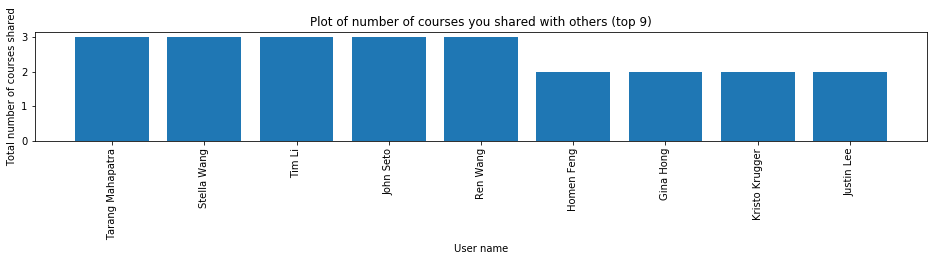

In [35]:

#use this ipython magic comamnd to display plots inline in the jupyter notebook
%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt

# this is used to fix a warning about future versions of pandas
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

# plot the users and number of courses shared
plt.figure(figsize=(16,2))
plt.bar([i[0] for i in share_rank_top], [i[1] for i in share_rank_top])
plt.title("Plot of number of courses you shared with others (top 9)")
plt.xlabel("User name")
plt.xticks(rotation=90)
plt.ylabel("Total number of courses shared")
plt.show()